In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import seaborn as sns 
import matplotlib.patches as mpatches
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
initialStoryPoints = 300
initialPriorityStoryPoints = 260
StoryPointsRemaining = 300
PriorityStoryPointsRemaining = 260
ActualData = {'Entry' : [0], 'Sprint' : [0], 'SPR' : [initialStoryPoints], 'PSPR' : [initialPriorityStoryPoints], 'DayWork' : ['Preparation'], 'Hours' : [2]}
ActualData = pd.DataFrame(data=ActualData)


In [3]:
CoffeTracker = {'Entry': [0], 'Sprint' : [0], 'Weekday' : 'Thursday', 'Edda' : [0], 'Darri' : [0], 'Axel' : [0]}
CoffeTracker = pd.DataFrame(data=CoffeTracker)

In [4]:
def updateDF(DF, sprint, workdone, hours, completedSP=0, completedPSP=0):
    global StoryPointsRemaining, PriorityStoryPointsRemaining
    StoryPointsRemaining -= completedSP
    PriorityStoryPointsRemaining -= completedPSP
    return DF.append({'Entry' : len(ActualData.index), 'Sprint' : sprint, 'SPR' : StoryPointsRemaining, 'PSPR' : PriorityStoryPointsRemaining, 'DayWork' : workdone, 'Hours' : hours}, ignore_index=True)

In [5]:
def updateCoffee(DF, sprint, weekday, edda, darri, axel):
    return DF.append({'Entry' : len(CoffeTracker.index), 'Sprint' : sprint, 'Weekday' : weekday, 'Edda' : edda, 'Darri' : darri, 'Axel' : axel}, ignore_index=True)

In [6]:
# UPDATES ACTUAL DATA!!
# updateDF Param:
# ActualData dataframe,
# no of sprint,
# total story points remaining
# total priority story points remaining
# Work done as category
ActualData = updateDF (ActualData, 0, 'Preparation', 2)
ActualData

,DayWork,Entry,Hours,PSPR,SPR,Sprint
0,Preparation,0,2,260,300,0
1,Preparation,1,2,260,300,0


In [7]:
def undoLastEntry(DF):
    return DF.drop(DF.index[len(DF)-1])

In [8]:
# UNDOES LAST ENTRY!!
# updateDF Param:
# ActualData dataframe,
#ActualData = 
ActualData = undoLastEntry(ActualData)
ActualData

,DayWork,Entry,Hours,PSPR,SPR,Sprint
0,Preparation,0,2,260,300,0


In [9]:
ActualData = undoLastEntry(ActualData)
ActualData

,DayWork,Entry,Hours,PSPR,SPR,Sprint


In [10]:
## FOR SPRINT 0 ACTUAL DATA
ActualData = updateDF (ActualData, 0, 'Fundur við fyrirtæki', 3*1)
ActualData = updateDF (ActualData, 0, 'Fundur við fyrirtæki', 3*1)
ActualData = updateDF (ActualData, 0, 'Skýrslugerð', 3)
ActualData = updateDF (ActualData, 0, 'Sniðmát fyrir frumgerðahönnun', 3)
ActualData = updateDF (ActualData, 0, 'Verklagsundirbúningur', 3*5)
ActualData = updateDF (ActualData, 0, 'Skýrslugerð', 2)

ActualData

,DayWork,Entry,Hours,PSPR,SPR,Sprint
0,Fundur við fyrirtæki,0,3,260,300,0
1,Fundur við fyrirtæki,1,3,260,300,0
2,Skýrslugerð,2,3,260,300,0
3,Sniðmát fyrir frumgerðahönnun,3,3,260,300,0
4,Verklagsundirbúningur,4,15,260,300,0
5,Skýrslugerð,5,2,260,300,0


In [11]:
# SPRINT 0 COFFEE
CoffeTracker = undoLastEntry(CoffeTracker)

In [12]:
# Tjékka hvort passar
sprint = 0
print('Total hours spent on sprint ' + str(sprint) + ': ' + str(ActualData[ActualData['Sprint'] == sprint].Hours.sum()))

Total hours spent on sprint 0: 29


In [13]:
# Generates productivity pie chart for a given sprint

def makeMePieChartFromSprint (sprint):
    
    # Frequency table created
    DayWorkDF = ActualData
    DayWorkDF = DayWorkDF[DayWorkDF['Sprint'] == sprint]
    DayWorkDF = DayWorkDF.loc[:, ['DayWork', 'Hours']]
    DayWorkDF = DayWorkDF.groupby(['DayWork'])['Hours'].sum().reset_index()
    DayWorkDF.sort_values(by=['Hours'], ascending=False)
    
    # Pallette
    cpallette = sns.color_palette("husl", 8)

    font = {'size'   : 16}
    plt.rc('font', **font)
    
    plt.pie( DayWorkDF.Hours,
             colors=cpallette,
             autopct='%1.1f%%',
             shadow=False,
             startangle=90 )
    
    plt.legend(DayWorkDF.DayWork, loc="best")
    
    plt.title('Verkefnayfirlit fyrir sprett ' + str(sprint), fontsize=20)
    plt.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches(13,7)
    plt.axis('equal')
    plt.savefig('VerkefnayfirlitSprettur' + str(sprint) + '.jpg')

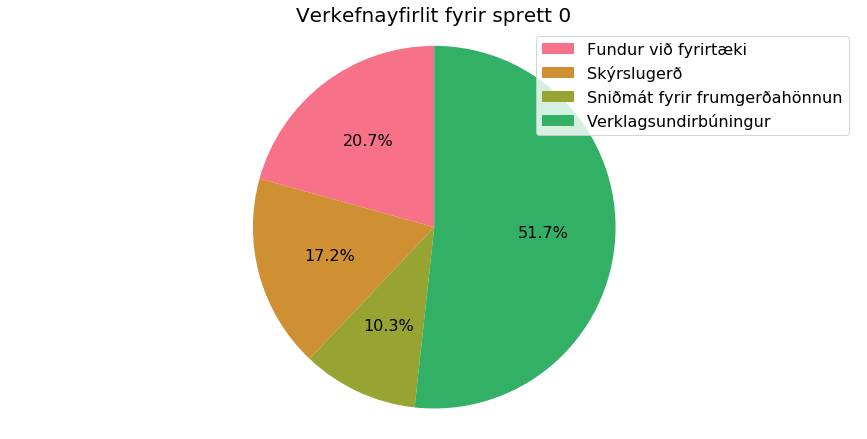

In [14]:
# Plot and save figure from a sprint
sprint = 0
makeMePieChartFromSprint(0)
plt.show()

In [15]:
# PLOTS BURNDOWNCHART FROM SPRINT

def plotBurndownChartFromSprint (sprint) :
    
    UniquePTS = ActualData.loc[:, ['SPR', 'PSPR','Sprint']]
    UniquePTS = UniquePTS.drop_duplicates()
    UniquePTS.sort_values(by=['SPR'], ascending=False)


    BDchartdata = UniquePTS[UniquePTS['Sprint'] == sprint].reset_index()
    BDchartdata.drop(['index'], axis = 1, inplace = True)
    BDchartdata=BDchartdata.reset_index()
    
    font = {'size'   : 15}
    plt.rc('font', **font)
    
    # Initialize the figure
    plt.style.use('seaborn-darkgrid')

    plt.figure(figsize = (20, 8)) 
 
    # create a color palette
    palette = plt.get_cmap('Set1')
    x1 = BDchartdata['index']
    y1 = BDchartdata['SPR']

    x2 = BDchartdata['index']
    y2 = BDchartdata['PSPR']

    AColor = '#99ffeb'
    AAColor = '#00cca3'
    EColor = '#ffcc99'
    EEColor = '#ff9933'

    # Plot the lineplot
    plt.plot(x1, y1, '--',
             marker='o',
             color=EColor,
             linewidth=1.9,
             label=BDchartdata.PSPR)

    plt.plot(x2, y2,
             marker='o',
             color=AAColor,
             linewidth=1.9,
             label=BDchartdata.SPR)

    plt.fill_between(x1, y2, color=AColor, alpha='0.6')
    plt.fill_between(x2, y1, color=EColor, alpha='0.1')

    plt.ylim(BDchartdata.PSPR.min()-150,BDchartdata.SPR.max()+50)
    plt.xlim(BDchartdata.index.min(),BDchartdata.index.max())

    all_patch = mpatches.Patch(color=EEColor, label='Heildarsögupunktar eftir')
    priority_patch = mpatches.Patch(color=AAColor, label='Heildarforgangssögupunktar eftir')

    plt.legend(handles=[all_patch, priority_patch])
    plt.title('Burndown Framvindurit fyrir sprett ' + str(sprint), fontsize=22)
    plt.ylabel('Sögupunktar', fontsize=16)
    
    font = {'size'   : 11}
    plt.rc('font', **font)
    
    for i in range(len(BDchartdata)):
        plt.text(i, BDchartdata.SPR[i] + 3, BDchartdata.SPR[i], ha='center', va='bottom')
        plt.text(i, BDchartdata.PSPR[i] + 3, BDchartdata.PSPR[i], ha='center', va='bottom')
    
    ax = plt.gca()
    ax.set_xticks([BDchartdata.index.min(), BDchartdata.index.max()])
    ax.set_xticklabels(["Sprettur " + str(sprint),"Sprettur " + str(sprint+1)])
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=16, rotation=30)
    
    plt.savefig('BurndownSprettur' + str(sprint) + '.jpg')

In [16]:
## SPRETTUR 1

# 22 jan
ActualData = updateDF (ActualData, 1, 'Skýrslugerð', 5*3)
# 26 jan
ActualData = updateDF (ActualData, 1, 'Skýrslugerð', 2*3)
ActualData = updateDF (ActualData, 1, 'Fundur við fyrirtæki', 4*3)
ActualData = updateDF (ActualData, 1, 'Uppsetning þróunartóla', 2*2, 2*2, 2*2) # SETJA UPP ÞRÓUNARUMHV
ActualData = updateDF (ActualData, 1, 'Uppsetning þróunartóla', 2, 2, 2) # SETJA UPP ÞRÓUNARUMHV
#29 jan
ActualData = updateDF (ActualData, 1, 'Kynningarundirbúningur', 2*3)
#1 feb
ActualData = updateDF (ActualData, 1, 'Fundur við fyrirtæki', 4*2, 4*2, 4*2) ## LÆRA Á FYRRA KERFI
ActualData = updateDF (ActualData, 1, 'Fundur við fyrirtæki', 4, 4, 4) ## LÆRA Á FYRRA KERFI

ActualData = updateDF (ActualData, 1, 'Undirbúningur: Þarfagreining', 2*3)
ActualData = updateDF (ActualData, 1, 'Undirbúningur: Frumgerðahönnun', 2*3)
#2 feb
ActualData = updateDF (ActualData, 1, 'Fundur við fyrirtæki', 2*3)
ActualData = updateDF (ActualData, 1, 'Undirbúningur: Þarfagreining', 3*3)
ActualData = updateDF (ActualData, 1, 'Undirbúningur: Frumgerðahönnun', 5*3)

ActualData

,DayWork,Entry,Hours,PSPR,SPR,Sprint
0,Fundur við fyrirtæki,0,3,260,300,0
1,Fundur við fyrirtæki,1,3,260,300,0
2,Skýrslugerð,2,3,260,300,0
3,Sniðmát fyrir frumgerðahönnun,3,3,260,300,0
4,Verklagsundirbúningur,4,15,260,300,0
5,Skýrslugerð,5,2,260,300,0
6,Skýrslugerð,6,15,260,300,1
7,Skýrslugerð,7,6,260,300,1
8,Fundur við fyrirtæki,8,12,260,300,1
9,Uppsetning þróunartóla,9,4,256,296,1


In [17]:
# SPRINT 1 COFFEE

# 25 jan
CoffeTracker = updateCoffee(CoffeTracker, 1, 'Thursday', 4, 3, 2)

# 26 jan
CoffeTracker = updateCoffee(CoffeTracker, 1, 'Friday', 2, 2, 2)

#1 feb
CoffeTracker = updateCoffee(CoffeTracker, 1, 'Thursday', 4, 4, 3)

#2 feb
CoffeTracker = updateCoffee(CoffeTracker, 1, 'Friday', 1, 2, 2)

CoffeTracker

,Axel,Darri,Edda,Entry,Sprint,Weekday
0,2,3,4,0,1,Thursday
1,2,2,2,1,1,Friday
2,3,4,4,2,1,Thursday
3,2,2,1,3,1,Friday


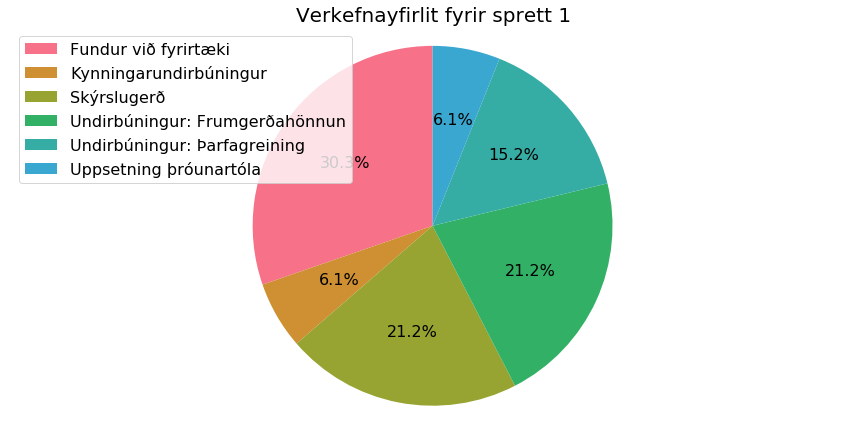

In [18]:
makeMePieChartFromSprint(1)
plt.show()

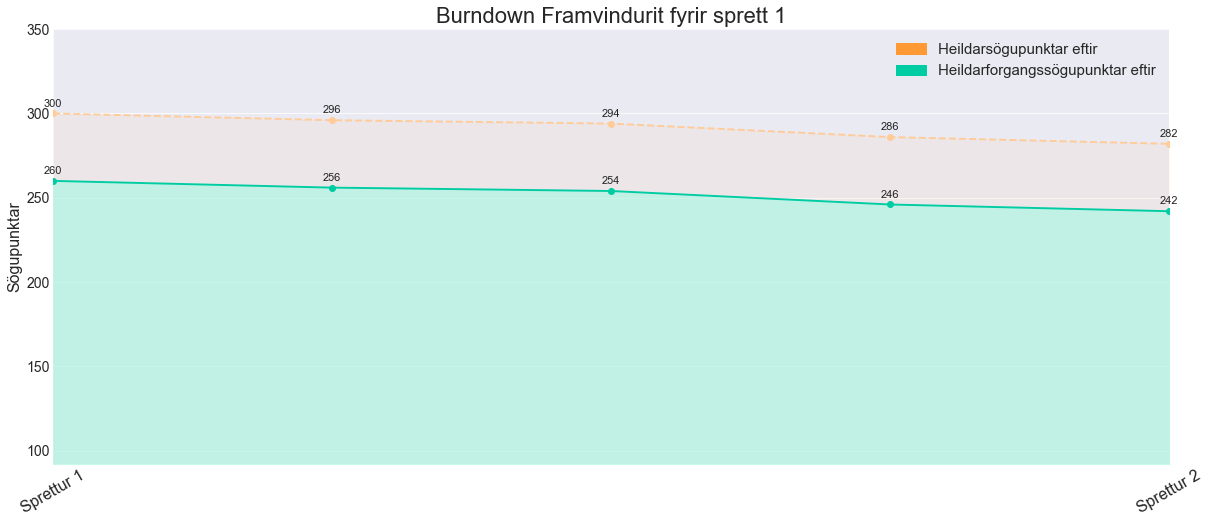

In [19]:
plotBurndownChartFromSprint(1)
plt.show()

In [20]:
## SPRETTUR 2
#DF, sprint, workdone, hours, completedSP=0, completedPSP=0

# FEB 9
ActualData = updateDF (ActualData, 2, 'Skýrslugerð', 3*4, 3, 3)
ActualData = updateDF (ActualData, 2, 'Rannsókn (API/ReactJS)', 3*5, 3, 3)

# FEB 15
ActualData = updateDF (ActualData, 2, 'Fundur við fyrirtæki', 3*1, 3, 3)
ActualData = updateDF (ActualData, 2, 'Uppsetning verkefnis', 3*3, 3, 3)
ActualData = updateDF (ActualData, 2, 'Forritun: Tengjast Vefþjónustu', 3*4, 5, 5)

# FEB 16
ActualData = updateDF (ActualData, 2, 'Forritun: Einstaklingaleit', 3*6, 7, 7)
ActualData = updateDF (ActualData, 2, 'Kynningarundirbúningur', 3*2, 5, 5)

# Tjékka hvort passar
sprint = 2
print('Total hours spent on sprint ' + str(sprint) + ': ' + str(ActualData[ActualData['Sprint'] == sprint].Hours.sum()))

Total hours spent on sprint 2: 75


In [21]:
## SPRINT 2 COFFEE

# FEB 9
CoffeTracker = updateCoffee(CoffeTracker, 2, 'Thursday', 1, 2, 2)

# FEB 15
CoffeTracker = updateCoffee(CoffeTracker, 2, 'Friday', 3, 4, 3)

# FEB 16
CoffeTracker = updateCoffee(CoffeTracker, 2, 'Thursday', 2, 3, 0)
CoffeTracker

,Axel,Darri,Edda,Entry,Sprint,Weekday
0,2,3,4,0,1,Thursday
1,2,2,2,1,1,Friday
2,3,4,4,2,1,Thursday
3,2,2,1,3,1,Friday
4,2,2,1,4,2,Thursday
5,3,4,3,5,2,Friday
6,0,3,2,6,2,Thursday


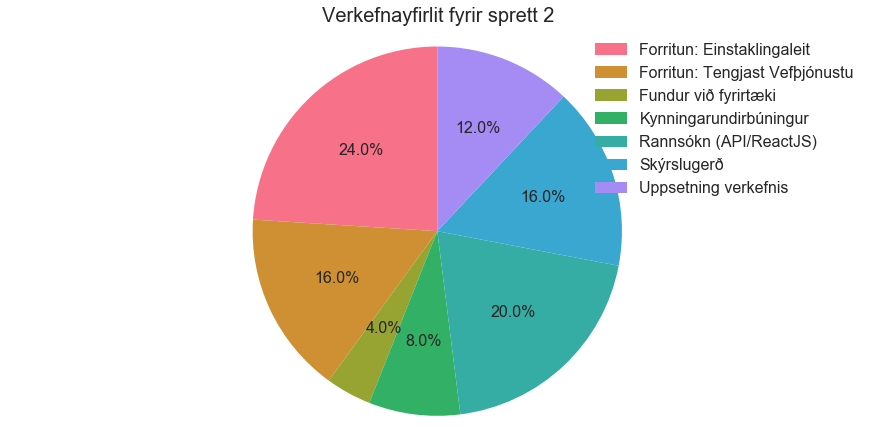

In [22]:
makeMePieChartFromSprint(2)
plt.show()

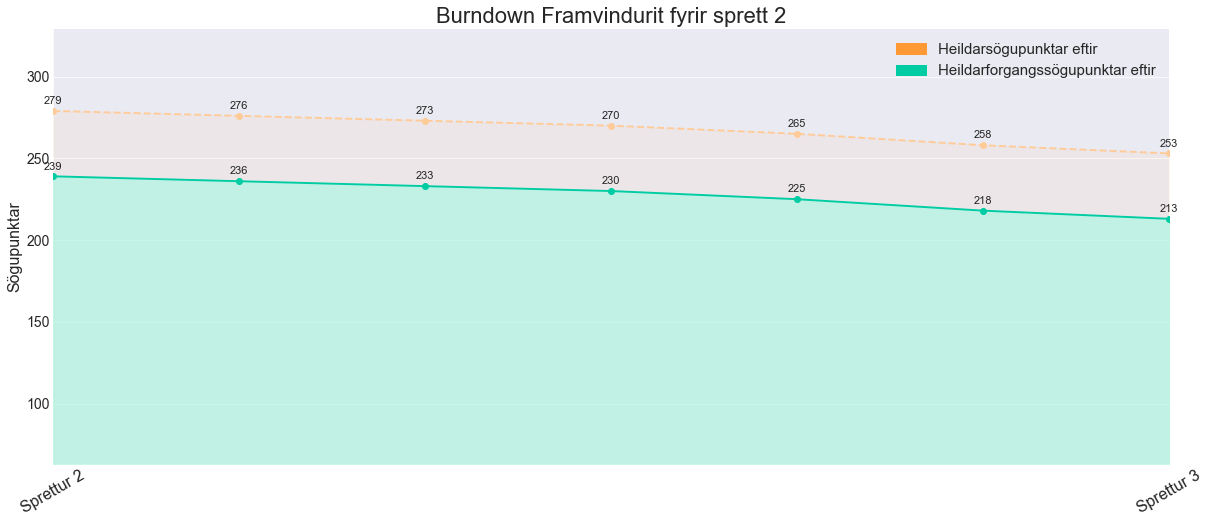

In [23]:
# Burndown from sprint 2
plotBurndownChartFromSprint(2)
plt.show()

In [24]:
## SPRETTUR 3
#DF, sprint, workdone, hours, completedSP=0, completedPSP=0
## 44

# FEB 22
ActualData = updateDF (ActualData, 3, 'Skýrslugerð: Sögupunktamat', 3*3, 3*3)
ActualData = updateDF (ActualData, 3, 'Forritun: Einstaklingsleit', 3*2, 4, 4)
ActualData = updateDF (ActualData, 3, 'Umhverfi: Continous Integration', 5, 4, 4)
ActualData = updateDF (ActualData, 3, 'Forritun: Sjálfvirkt token', 7, 10, 10)

# FEB 23
ActualData = updateDF (ActualData, 3, 'Forritun: Sjálfvirkt token', (2*9)+1, 10, 10)
ActualData = updateDF (ActualData, 3, 'Forritun: Einstaklingsleit', 9, 5, 5)

# MARCH 1
ActualData = updateDF (ActualData, 3, 'Forritun: Einstaklingaleit', 8, 5, 5)
ActualData = updateDF (ActualData, 3, 'Forritun: Code Refactor', 8)


# MARCH 2
ActualData = updateDF (ActualData, 3, 'Forritun: Bug Fix', 3, 3, 3)
ActualData = updateDF (ActualData, 3, 'Forritun: Code Refactor', 2, 2)
ActualData = updateDF (ActualData, 3, 'Forritun: Einstaklingsleit', 3, 3, 3)

# Tjékka hvort passar
sprint = 3
print('Total hours spent on sprint ' + str(sprint) + ': ' + str(ActualData[ActualData['Sprint'] == sprint].Hours.sum()))

Total hours spent on sprint 3: 79


In [25]:
## SPRINT 3 COFFEE (edda/darri/axel)

# FEB 22
CoffeTracker = updateCoffee(CoffeTracker, 3, 'Thursday', 3, 4, 1)

# FEB 23
CoffeTracker = updateCoffee(CoffeTracker, 3, 'Friday', 2, 3, 1)

# MARCH 1
CoffeTracker = updateCoffee(CoffeTracker, 3, 'Thursday', 3, 0, 1)

# MARCH 2
CoffeTracker = updateCoffee(CoffeTracker, 3, 'Friday', 3, 0, 0)

CoffeTracker

,Axel,Darri,Edda,Entry,Sprint,Weekday
0,2,3,4,0,1,Thursday
1,2,2,2,1,1,Friday
2,3,4,4,2,1,Thursday
3,2,2,1,3,1,Friday
4,2,2,1,4,2,Thursday
5,3,4,3,5,2,Friday
6,0,3,2,6,2,Thursday
7,1,4,3,7,3,Thursday
8,1,3,2,8,3,Friday
9,1,0,3,9,3,Thursday


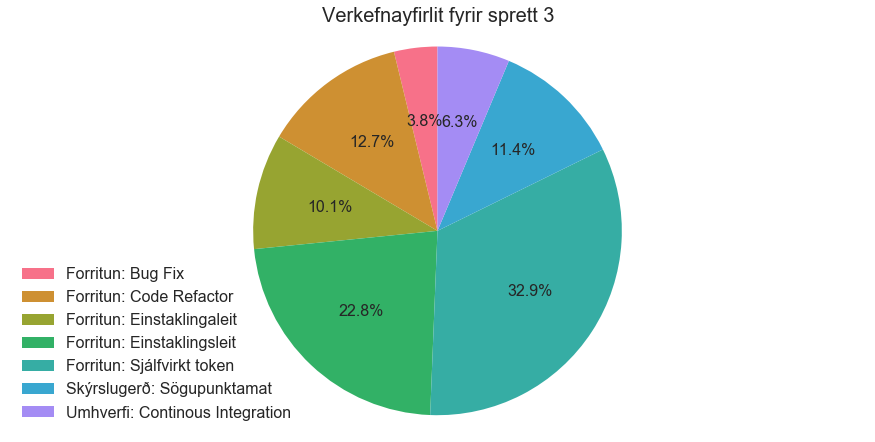

In [26]:
makeMePieChartFromSprint(3)
plt.show()

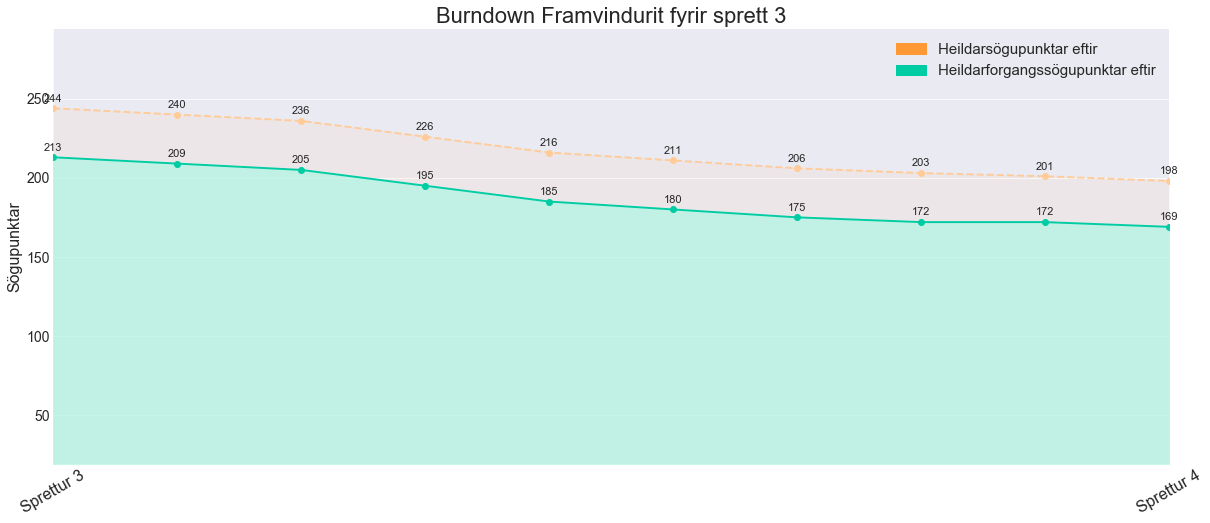

In [27]:
# Burndown from sprint 3
plotBurndownChartFromSprint(3)
plt.show()

In [28]:
# Generates coffee pie of thursdays vs fridays

def thursdaysVsFridaysCoffeePieChart ():
    
    # Frequency table created
    CoffePie = CoffeTracker
    CoffePie = CoffePie.loc[:, ['Axel', 'Darri', 'Edda', 'Weekday']]
    CoffePie = CoffePie.groupby(['Weekday'])['Axel', 'Darri', 'Edda'].sum().reset_index()
    CoffePie.sort_values(by=['Weekday'], ascending=False)
    CoffePie['totalCoffee'] = CoffePie.apply(lambda row: row.Edda + row.Darri + row.Axel, axis=1)
    CoffePie = CoffePie.loc[:, ['Weekday', 'totalCoffee']]
    
    # Pallette
    cpallette = sns.color_palette("husl", 8)

    font = {'size'   : 16}
    plt.rc('font', **font)
    
    plt.bar( CoffePie.Weekday,
             list(CoffePie.totalCoffee),
             color=cpallette)
    
    plt.title('Fimmtudagar vs Föstudagar: Kaffi', fontsize=20)
    plt.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches(7,6)
    #plt.axis('equal')
    plt.savefig('LokaverkefniKaffiFimmtudagarVsFöstudagar.jpg')

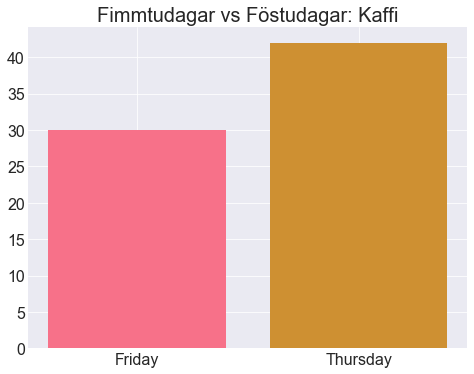

In [29]:
thursdaysVsFridaysCoffeePieChart()
plt.show()

In [30]:
# Generates coffee pie of thursdays vs fridays

def whoWinsCoffeePlot ():
    
    # Frequency table created
    CoffeIndividual = CoffeTracker.groupby(['Weekday'])['Axel', 'Darri', 'Edda'].sum()
    CoffeIndividual = CoffeIndividual.loc[:, ['Axel', 'Darri', 'Edda']].sum().reset_index()
    CoffeIndividual = CoffeIndividual.groupby(['Axel', 'Darri', 'Edda']).sum()
    
    # Pallette
    cpallette = sns.color_palette("husl", 8)

    font = {'size'   : 16}
    plt.rc('font', **font)
        
    plt.bar( CoffeIndividual.index,
             list(CoffeIndividual.loc[:, 0]),
             color=cpallette,)
    
    plt.title('Hver vinnur kaffi?', fontsize=20)
    plt.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches(5,6)
    #plt.axis('equal')
    plt.savefig('LokaverkefniKaffiWinner.jpg')

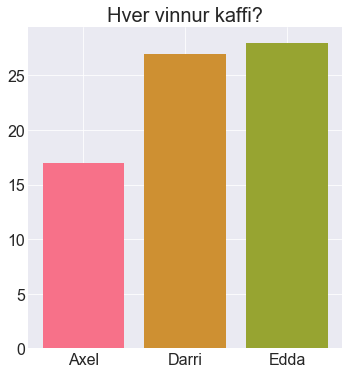

In [31]:
whoWinsCoffeePlot()
plt.show()

In [32]:
## SPRETTUR 4
#DF, sprint, workdone, hours, completedSP=0, completedPSP=0
## 40 hrs total
sprint = 4

# MAR 8
ActualData = updateDF (ActualData, sprint, 'Skýrslugerð', 3*3)
ActualData = updateDF (ActualData, sprint, 'Útlit: MaterialUI', 2*3)
ActualData = updateDF (ActualData, sprint, 'Forritun: Nánari upplýsingar greiðslumats', 3*3, 2, 2)

# MAR 9
ActualData = updateDF (ActualData, sprint, 'Forritun: Nánari upplýsingar greiðslumats', 2*2, 2, 2)
ActualData = updateDF (ActualData, sprint, 'Code Refactor', 2*2)
ActualData = updateDF (ActualData, sprint, 'Útlit: MaterialUI', 2*2)
ActualData = updateDF (ActualData, sprint, 'Code Refactor', 2*2)

# Tjékka hvort passar
print('Total hours spent on sprint ' + str(sprint) + ': ' + str(ActualData[ActualData['Sprint'] == sprint].Hours.sum()))

Total hours spent on sprint 4: 40


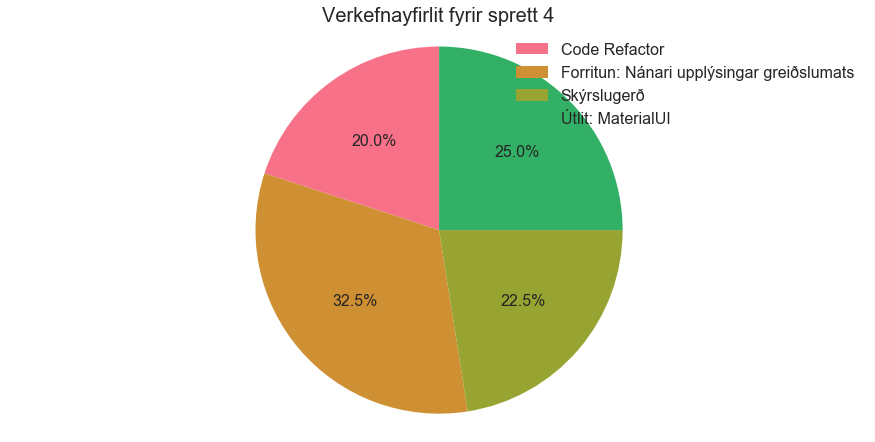

In [33]:
makeMePieChartFromSprint(4)
plt.show()

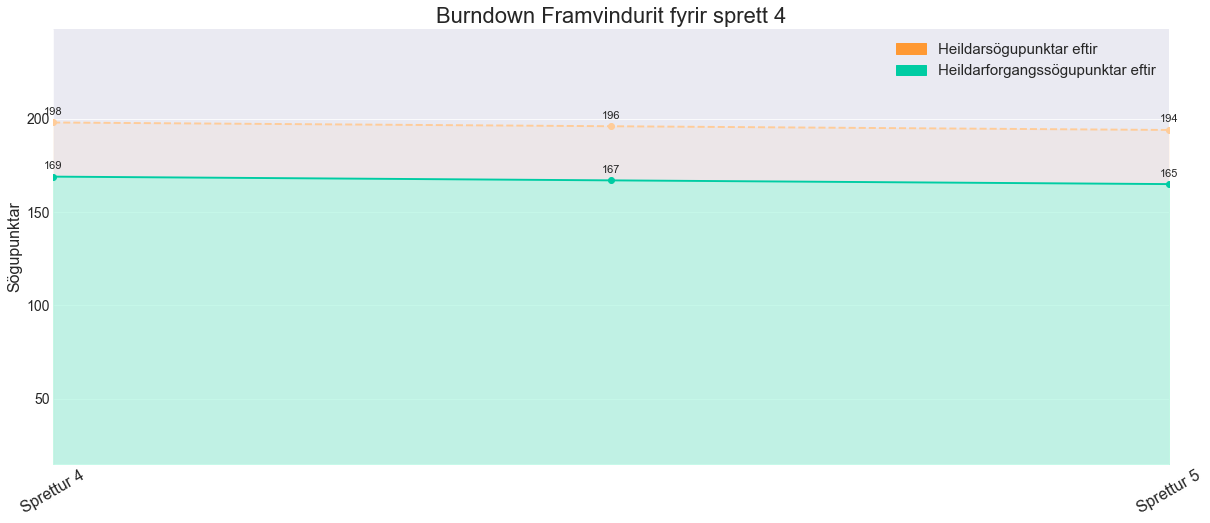

In [34]:
# Burndown from sprint 3
plotBurndownChartFromSprint(4)
plt.show()